In [1]:
#All imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing

In [2]:
#Load the csv file as Pandas dataframe and check its shape
#Note the warning below: The data contains few erroneous rows that have extra values in its 11th column;
#read_csv function skips these erroneous cases from our dataframe df.
#The original csv file 
df = pd.read_csv('goodreads_data.csv')

### Peek into first 5 rows and the column names of the dataframe

In [3]:
#Let's look at the first 5 rows of the data
#We do see the 10 column names and clearly J.K. Rowling's Harry Potter books...yaay :-)!
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [4]:
# print column names 
print("Column names: {0}".format(list(df.columns)))

Column names: ['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL']


## There are no invalid data. The Data is already clean.

In [5]:
#Check if the data has any null values
df.isnull().values.any()

True

## Explore the variabels to understand the data better.

In [6]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [7]:
# Replace ',' with ''
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '')

# Convert to float
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')

# Display the DataFrame
df.describe()

,Unnamed: 0,Avg_Rating,Num_Ratings
count,10000.00000,10000.000000,1.000000e+04
mean,4999.50000,4.068577,9.305497e+04
std,2886.89568,0.335359,3.421488e+05
min,0.00000,0.000000,0.000000e+00
25%,2499.75000,3.880000,5.180000e+02
50%,4999.50000,4.080000,1.584350e+04
75%,7499.25000,4.260000,6.475100e+04
max,9999.00000,5.000000,9.278135e+06


In [8]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,https://www.goodreads.com/book/show/170448.Ani...


In [20]:
df.tail()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...
9999,9999,Bits and Pieces: Tales and Sonnets,Jas T. Ward,After demands of thousands of fans in various ...,[],5.00,36,https://www.goodreads.com/book/show/21302552-b...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [9]:
df.describe()

,Unnamed: 0,Avg_Rating,Num_Ratings
count,10000.00000,10000.000000,1.000000e+04
mean,4999.50000,4.068577,9.305497e+04
std,2886.89568,0.335359,3.421488e+05
min,0.00000,0.000000,0.000000e+00
25%,2499.75000,3.880000,5.180000e+02
50%,4999.50000,4.080000,1.584350e+04
75%,7499.25000,4.260000,6.475100e+04
max,9999.00000,5.000000,9.278135e+06


## Which authors wrote the most books (peek into the top 10)?

In [10]:
# Group by 'Authors' and count the number of books
author_counts = df['Author'].value_counts()

# Select the top 10 authors
top10Authors = author_counts.head(10)

# Display the result
print(top10Authors)

Author
Stephen King           57
William Shakespeare    39
Terry Pratchett        35
Agatha Christie        33
Anonymous              28
Rick Riordan           26
John Grisham           23
Julie Mannino          22
Lucian Bane            22
C.S. Lewis             20
Name: count, dtype: int64


## 2. Who are the top 10 highly rated and the bottom 5 poorly rated authors?
### The graphs below show the Top 10 and Bottom 5 rated authors

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_412\557857855.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=GoodRatedAuthors['Book'], y=GoodRatedAuthors.index, palette='Set2')


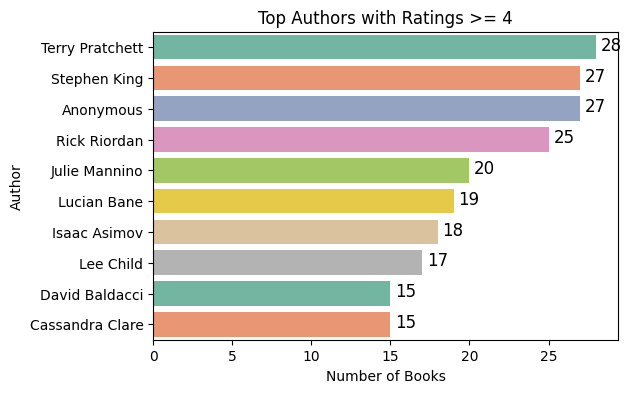

In [11]:
GoodRating = 4
GoodRatedAuthors = df[df['Avg_Rating'] >= GoodRating]
GoodRatedAuthors = GoodRatedAuthors.groupby('Author')['Book'].count().reset_index().sort_values('Book', ascending=False).head(10).set_index('Author')

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=GoodRatedAuthors['Book'], y=GoodRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Author")

for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), fontsize=12, color='k')

plt.title(f"Top Authors with Ratings >= {GoodRating}")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_412\4068331478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=BadRatedAuthors['Book'], y=BadRatedAuthors.index, palette='Set2')


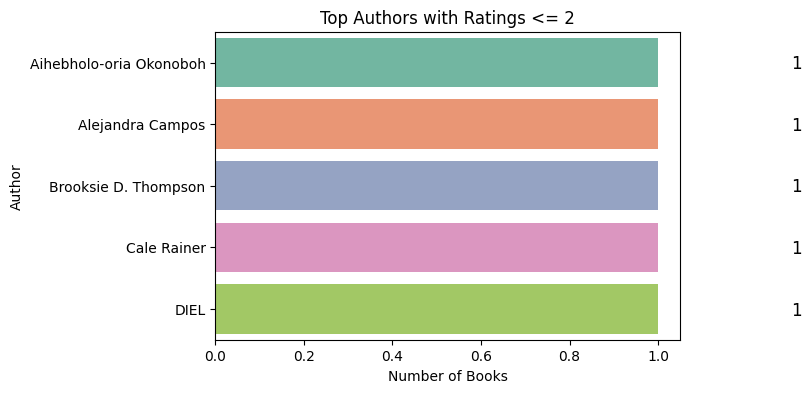

In [12]:
BadRating = 2
BadRatedAuthors = df[df['Avg_Rating'] <= BadRating]
BadRatedAuthors = BadRatedAuthors.groupby('Author')['Book'].count().reset_index().sort_values('Book', ascending=False).head(5).set_index('Author')

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=BadRatedAuthors['Book'], y=BadRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Author")

for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), fontsize=12, color='k')

plt.title(f"Top Authors with Ratings <= {BadRating}")
plt.show()

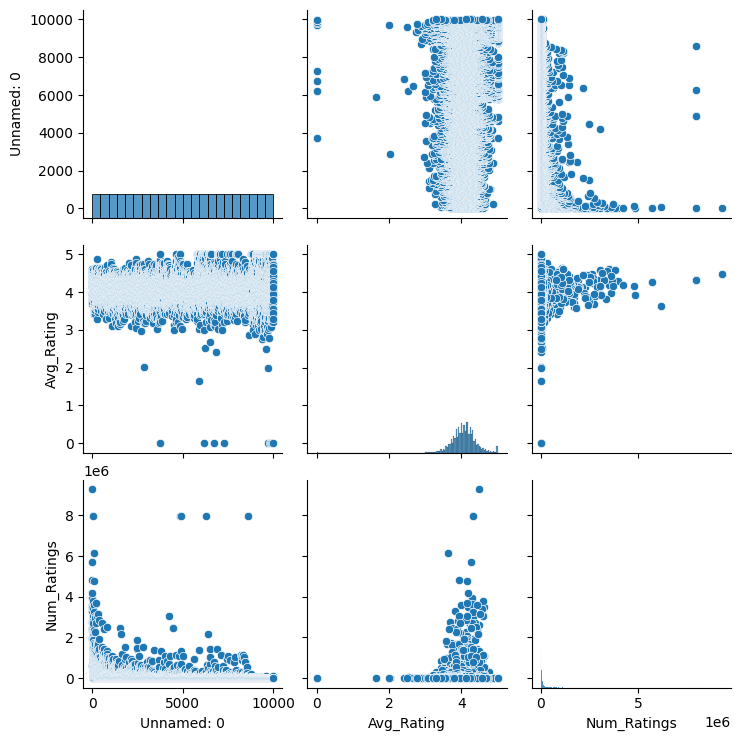

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
# Assuming df is already defined
# Replace ',' with ''
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '')

# Convert to float
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')

# Display the DataFrame
print(df)
# Calculate correlation
corr = df[['Avg_Rating', 'Num_Ratings']].corr()

# Display the correlation matrix
print(corr)


AttributeError: Can only use .str accessor with string values!

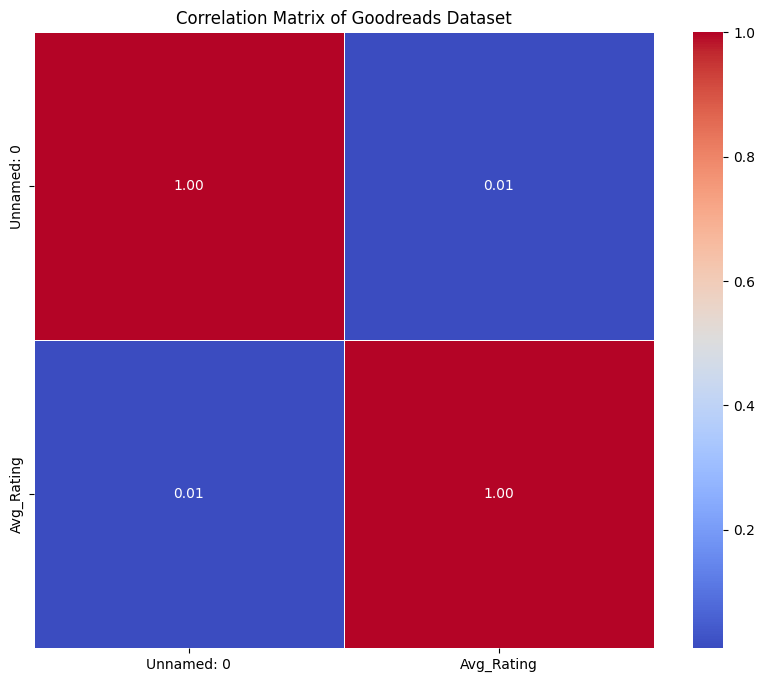

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Goodreads dataset
df = pd.read_csv('goodreads_data.csv')

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Goodreads Dataset')
plt.show()



## Check out the categorical variables in data

In [19]:
categoricalVars = ['Avg_Rating', 'Num_Ratings']
df[categoricalVars].describe()

,Avg_Rating
count,10000.000000
mean,4.068577
std,0.335359
min,0.000000
25%,3.880000
50%,4.080000
75%,4.260000
max,5.000000
